# Graphs

# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
#from matplotlib.ticker import OldScalarFormatter, ScalarFormatter

# Import Data

In [3]:
#import and concat data
file_list = ['sensor_A0', 'sensor_A1', 'sensor_A2', 'sensor_A3', 'sensor_A4', 'sensor_A5', 'sensor_A6', 'sensor_A7', 'sensor_B0', 'sensor_B1', 'sensor_B2', 'sensor_B3', 'sensor_B4', 'sensor_B5', 'sensor_B6', 'sensor_B7', 'sensor_empty_first']
columns = ['Measurement_id', 'Sensor_id', 'Weight', 'Timestamp', 'B2', 'B1', 'A2', 'A1', 'B3', 'B0', 'A3', 'A0', 'B6', 'B5', 'A6', 'A5', 'B7', 'B4', 'A7', 'A4', 'MISTAKE']
df_raw = pd.DataFrame(columns = columns)

#print(df.head(10))

for file in file_list:
    df_temp = pd.read_csv(f'sensor_experiment/{file}.csv', header=None)
    df_temp.columns = columns
    if 'sensor_empty' in file:
        df_temp.Weight = 0
    df_raw = pd.concat([df_raw, df_temp], axis=0)



print(df_raw.shape)
df_raw = df_raw.drop(['MISTAKE'], axis=1)
df_raw.head(20)

(25800, 21)


,Measurement_id,Sensor_id,Weight,Timestamp,B2,B1,A2,A1,B3,B0,A3,A0,B6,B5,A6,A5,B7,B4,A7,A4
0,0,A0,200.0,2024-02-20 09:44:35.868482,151943408.0,151423920.0,152694416.0,153604208.0,150984208.0,153724864.0,152858352.0,152485984.0,151716672.0,152034384.0,154874304.0,153415104.0,152283504.0,151467888.0,152028144.0,152497712.0
1,0,A0,200.0,2024-02-20 09:44:36.413608,151942544.0,151422752.0,152694128.0,153604496.0,150984784.0,153724576.0,152857184.0,152480064.0,151716384.0,152032208.0,154873424.0,153415104.0,152283504.0,151467312.0,152029584.0,152498880.0
2,0,A0,200.0,2024-02-20 09:44:36.958883,151943408.0,151423920.0,152694576.0,153603920.0,150984784.0,153724576.0,152858352.0,152478016.0,151716784.0,152028864.0,154873872.0,153415104.0,152283504.0,151467600.0,152021472.0,152490832.0
3,0,A0,200.0,2024-02-20 09:44:37.504052,151943408.0,151423040.0,152694128.0,153603920.0,150984496.0,153724576.0,152857184.0,152479280.0,151717248.0,152029008.0,154874016.0,153415104.0,152283632.0,151467888.0,152021760.0,152500816.0
4,0,A0,200.0,2024-02-20 09:44:38.049228,151953264.0,151421888.0,152665136.0,153568496.0,150990480.0,153723696.0,152841024.0,152432224.0,151725824.0,152034080.0,154859248.0,153391968.0,152298688.0,151478000.0,152008256.0,152471808.0
5,0,A0,200.0,2024-02-20 09:44:38.594605,151957040.0,151419872.0,152655152.0,153552096.0,150992496.0,153723392.0,152834896.0,152404304.0,151727216.0,152033792.0,154855248.0,153391680.0,152302464.0,151480320.0,152012032.0,152466576.0
6,0,A0,200.0,2024-02-20 09:44:39.139287,151956752.0,151422464.0,152656896.0,153551808.0,150992496.0,153723984.0,152835472.0,152408672.0,151726624.0,152031760.0,154855264.0,153391392.0,152303616.0,151481184.0,152006512.0,152468032.0
7,0,A0,200.0,2024-02-20 09:44:39.683718,151956464.0,151419584.0,152654560.0,153551216.0,150993360.0,153723696.0,152835776.0,152405760.0,151728080.0,152041920.0,154855712.0,153391680.0,152303616.0,151480816.0,152016528.0,152467552.0
8,0,A0,200.0,2024-02-20 09:44:40.228897,151957328.0,151422752.0,152656896.0,153552096.0,150992496.0,153723696.0,152835776.0,152405472.0,151726336.0,152041632.0,154855552.0,153391392.0,152303328.0,151480896.0,152016976.0,152465408.0
9,0,A0,200.0,2024-02-20 09:44:40.774680,151957040.0,151420736.0,152654864.0,153551504.0,150991632.0,153723696.0,152835712.0,152404304.0,151726400.0,152034384.0,154855264.0,153391392.0,152303216.0,151480320.0,152010304.0,152465504.0


# Helper functions

In [4]:
id_list = ['B2', 'B1', 'A2', 'A1', 'B3', 'B0', 'A3', 'A0', 'B6', 'B5', 'A6', 'A5', 'B7', 'B4', 'A7', 'A4']
df_raw['New_Index'] = df_raw.groupby(['Measurement_id','Sensor_id', 'Weight']).cumcount() #index 0-40 within each measurement ID


def convert_inductance(df):
    df_temp = df.copy()
    id_list = ['B2', 'B1', 'A2', 'A1', 'B3', 'B0', 'A3', 'A0', 'B6', 'B5', 'A6', 'A5', 'B7', 'B4', 'A7', 'A4']
    for id in id_list:
        df_temp[id] = df_temp[id].apply(lambda raw: ((1000000 * ( ( 2**25 ) / (math.pi * raw))**2)))
    return df_temp

def plot(df=None, sensor=None, weight=None, measure=None, single_sensor=None): # select data for chosen sensor, weight & measurement type (std, mean)
    df2 = df.copy()
    if single_sensor == None:
        test = df2[(df2.Sensor_id == sensor) & (df2.Weight == weight)]
    else: 
        test = df2[(df2.Sensor_id == single_sensor) & (df2.Weight == weight)]
    plottest = test.groupby('New_Index').agg({id: ['mean','std'] for id in id_list})
    if measure == 'std':
        return plottest[(sensor, 'std')]
    else: 
        return plottest[(sensor, 'mean')]

    
def create_figure(df, sensor = None, weight = None, measure = None, weights = None, colors = None, title = None):
    x = np.array(np.arange(0,20, 0.5))
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111)
    if weights != None:
        for weight, color in zip(weights, colors):
            line_=ax.errorbar(x, plot(df, sensor, weight, 'mean'), yerr=plot(df, sensor, weight, 'std'), ls = '--', color=color, label=weight)
    elif sensor == None: 
        for sensor in id_list:
            line=ax.errorbar(x, plot(df, sensor, weight, 'mean'), yerr=plot(df, sensor, weight, 'std'), ls = '--', label=sensor)
    else:
        for sensors in id_list:
            line=ax.errorbar(x, plot(df=df, sensor=sensors, weight=weight, measure='mean', single_sensor=sensor), yerr=plot(df=df, sensor=sensors, weight=weight, measure='std', single_sensor=sensor), ls = '--', label=sensors)

    plt.title(title, fontsize = 22)
    plt.legend()
    ax.set_xlabel('Seconds', fontsize = 18)
    ax.set_ylabel('Frequency', fontsize = 18)
    plt.savefig('Figure1.png')
    plt.show()


# Graphs Raw data

## All weights & One sensor

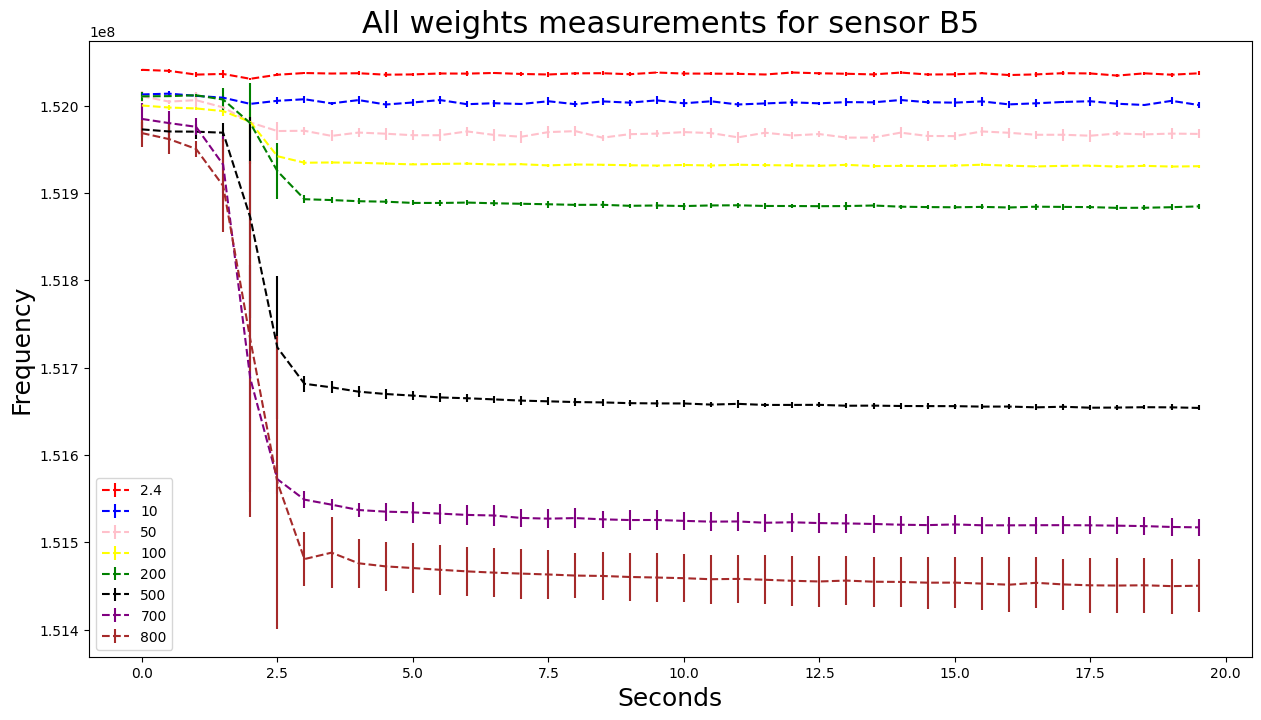

In [5]:

#x = np.array(range(0,40))

df_temp = df_raw.copy()

df_inductance = convert_inductance(df_temp)

weights = [2.4, 10, 50, 100, 200, 500, 700, 800]
colors = ["red", "blue", "pink", "yellow", "green", "black", "purple", "brown"]
sensor = 'B5'

create_figure(df=df_raw, sensor=sensor, weights=weights, colors=colors, title=f'All weights measurements for sensor {sensor}')



## One weight & All sensors & Weight applied to all

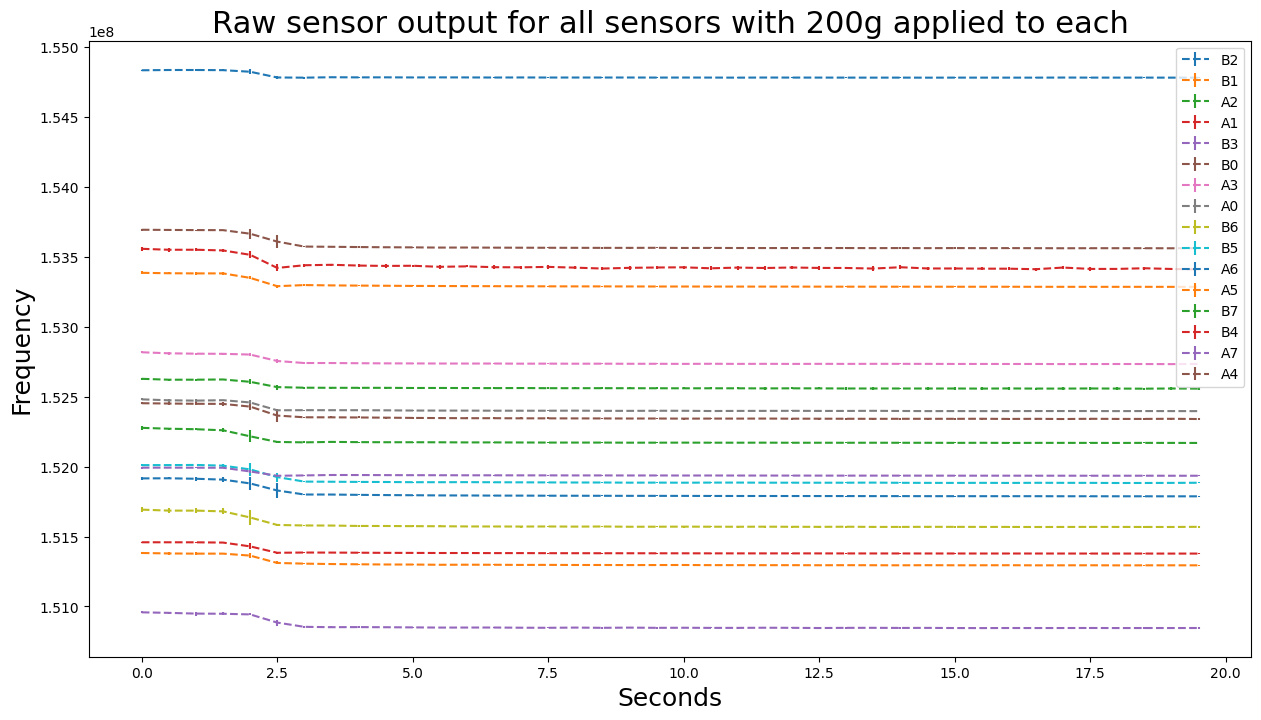

In [6]:
weight = 200

create_figure(df_raw, weight=weight, title=f'Raw sensor output for all sensors with {weight}g applied to each')

## One weight & All Sensors & Weight applied to one

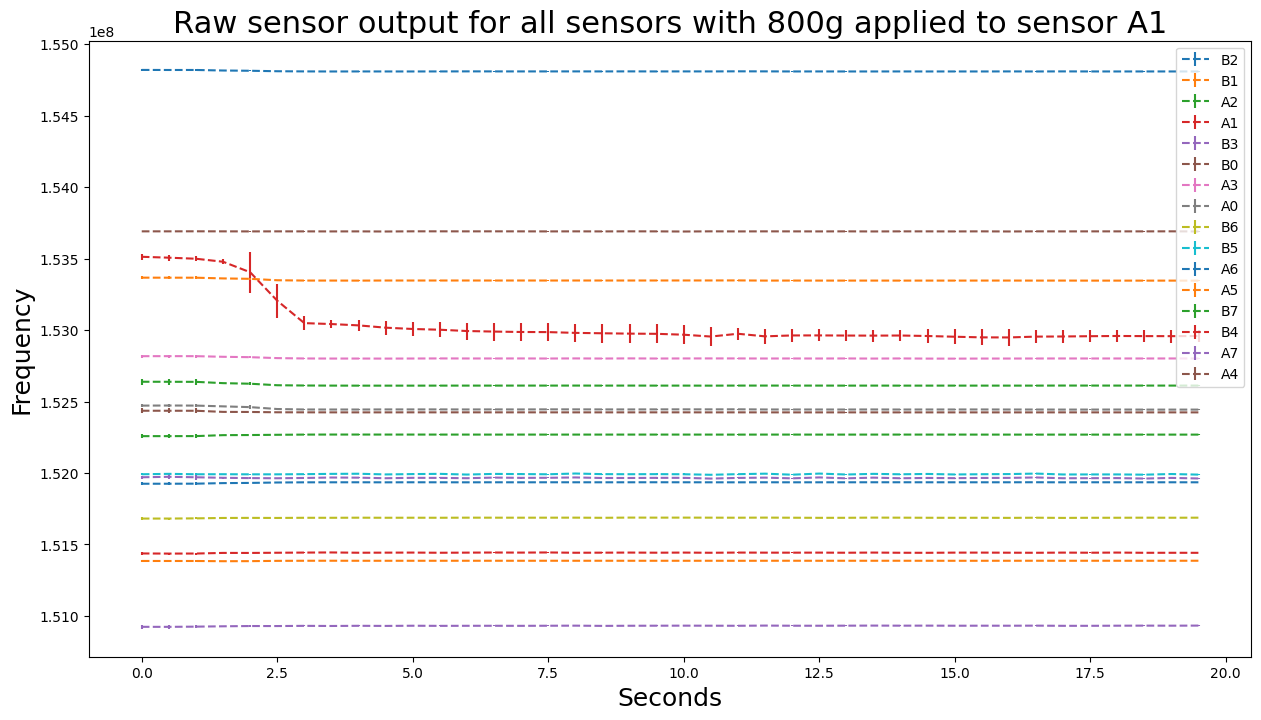

In [7]:
weight = 800
sensor = 'A1'

create_figure(df_raw, weight=weight, sensor=sensor, title=f'Raw sensor output for all sensors with {weight}g applied to sensor {sensor}')

# Experiment with when the measurements can be called 'stable'

# Baseline

In [66]:
#bør man hellere tage baseline som de values lige inden, vægten bliver lagt på? baseline er 20 målinger i c++ kode
baseline = df_raw[df_raw['Weight']==0]

baseline = convert_inductance(baseline)

baseline_mean = baseline.mean(axis=0, numeric_only=True)
#baseline_mean_output["A0"].values[0]

#bør man hellere tage baseline som de values lige inden, vægten bliver lagt på? baseline er 20 målinger i c++ kode
baseline_raw = df_raw[df_raw['Weight']==0]

baseline_raw_mean = baseline_raw.mean(axis=0, numeric_only=True)
#baseline_mean_output["A0"].values[0]

baseline_raw_mean

Weight       0.000000e+00
B2           1.519604e+08
B1           1.514307e+08
A2           1.527015e+08
A1           1.536173e+08
B3           1.509644e+08
B0           1.537464e+08
A3           1.528781e+08
A0           1.525353e+08
B6           1.517382e+08
B5           1.520544e+08
A6           1.548962e+08
A5           1.534352e+08
B7           1.523157e+08
B4           1.514944e+08
A7           1.520305e+08
A4           1.525099e+08
New_Index    1.950000e+01
dtype: float64

In [10]:
baseline

,Measurement_id,Sensor_id,Weight,Timestamp,B2,B1,A2,A1,B3,B0,...,A0,B6,B5,A6,A5,B7,B4,A7,A4,New_Index
0,0,empty,0.0,2024-02-23 09:25:16.701807,4939.893645,4974.546847,4891.950013,4833.808138,5005.166667,4825.692730,...,4902.487772,4954.303051,4933.656141,4754.307236,4845.269826,4916.840096,4970.260773,4935.238820,4904.115153,0
1,0,empty,0.0,2024-02-23 09:25:17.247169,4939.857238,4974.414400,4891.880306,4833.753766,5005.181520,4825.674652,...,4902.487772,4954.340664,4933.674830,4754.323933,4845.269826,4916.840096,4970.260773,4935.266866,4904.408415,1
2,0,empty,0.0,2024-02-23 09:25:17.790732,4939.874921,4974.371303,4892.010495,4833.789007,5005.199555,4825.677665,...,4902.487772,4954.298872,4933.637453,4754.289557,4845.288014,4916.847326,4970.241876,4935.257517,4904.115153,2
3,0,empty,0.0,2024-02-23 09:25:18.336811,4939.885323,4974.446985,4892.010495,4833.770883,5005.181520,4825.656574,...,4902.736661,4954.321857,4933.674830,4754.235539,4845.269826,4916.802910,4970.230328,4935.238820,4904.514407,3
4,0,empty,0.0,2024-02-23 09:25:18.882037,4939.838514,4974.490083,4892.010495,4833.808138,5005.161362,4825.674652,...,4902.450748,4954.298872,4933.628108,4754.216879,4845.288014,4916.784317,4970.230328,4935.229471,4904.277730,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4,empty,0.0,2024-02-23 09:27:14.973425,4939.809388,4974.414400,4891.973591,4833.883656,5005.219713,4825.785133,...,4902.699635,4954.412755,4933.806691,4754.471261,4845.362791,4916.821503,4970.298567,4935.313611,4904.115153,35
196,4,empty,0.0,2024-02-23 09:27:15.518589,4939.866599,4974.390223,4892.010495,4833.864525,5005.334294,4825.785133,...,4902.567990,4954.336484,4933.788002,4754.434919,4845.325403,4916.784317,4970.279670,4935.276215,4904.457809,36
197,4,empty,0.0,2024-02-23 09:27:16.063694,4939.819790,4974.357638,4892.028948,4833.864525,5005.199555,4825.785133,...,4902.755174,4954.203799,4933.769313,4754.362237,4845.343592,4916.791547,4970.298567,4935.294913,4904.569977,37
198,4,empty,0.0,2024-02-23 09:27:16.608829,4939.818750,4974.452241,4892.085331,4833.883656,5005.315197,4825.804216,...,4902.661581,4954.480668,4933.769313,4754.471261,4845.362791,4916.791547,4970.279670,4935.294913,4904.115153,38


In [11]:
# df_base = df_raw.copy() 

for id in id_list:
    df_inductance[id] = df_inductance[id].apply(lambda raw: raw - baseline_mean[id])

# df_induct[id_list] = df[id_list].applymap(lambda raw: (baseline_mean_output[id_list].values[0] - (1000000 * ( ( 2**25 ) / (math.pi * raw))**2)))

df_inductance['New_Index'] = df_inductance.groupby(['Measurement_id','Sensor_id', 'Weight']).cumcount()


,Measurement_id,Sensor_id,Weight,Timestamp,B2,B1,A2,A1,B3,B0,...,A0,B6,B5,A6,A5,B7,B4,A7,A4,New_Index
0,0,A0,200.0,2024-02-20 09:44:35.868482,1.425761,0.775041,0.765456,1.126768,-0.983713,1.653204,...,3.486493,1.727642,1.617183,1.634497,1.574780,2.397993,2.066692,0.473911,1.099114,0
1,0,A0,200.0,2024-02-20 09:44:36.413608,1.481956,0.851794,0.783913,1.108638,-1.021894,1.671292,...,3.867460,1.746458,1.758461,1.688544,1.574780,2.397993,2.104510,0.380411,1.023972,1
2,0,A0,200.0,2024-02-20 09:44:36.958883,1.425761,0.775041,0.755202,1.144899,-1.021894,1.671292,...,3.999264,1.720325,1.975583,1.661029,1.574780,2.397993,2.085601,0.907166,1.541761,2
3,0,A0,200.0,2024-02-20 09:44:37.504052,1.425761,0.832868,0.783913,1.144899,-1.002803,1.671292,...,3.917915,1.690011,1.966233,1.652185,1.574780,2.389723,2.066692,0.888463,0.899427,3
4,0,A0,200.0,2024-02-20 09:44:38.049228,0.784783,0.908571,2.642423,3.375752,-1.399445,1.726561,...,6.947713,1.129772,1.636920,2.559333,3.036998,1.417165,1.402854,1.765530,2.766044,4


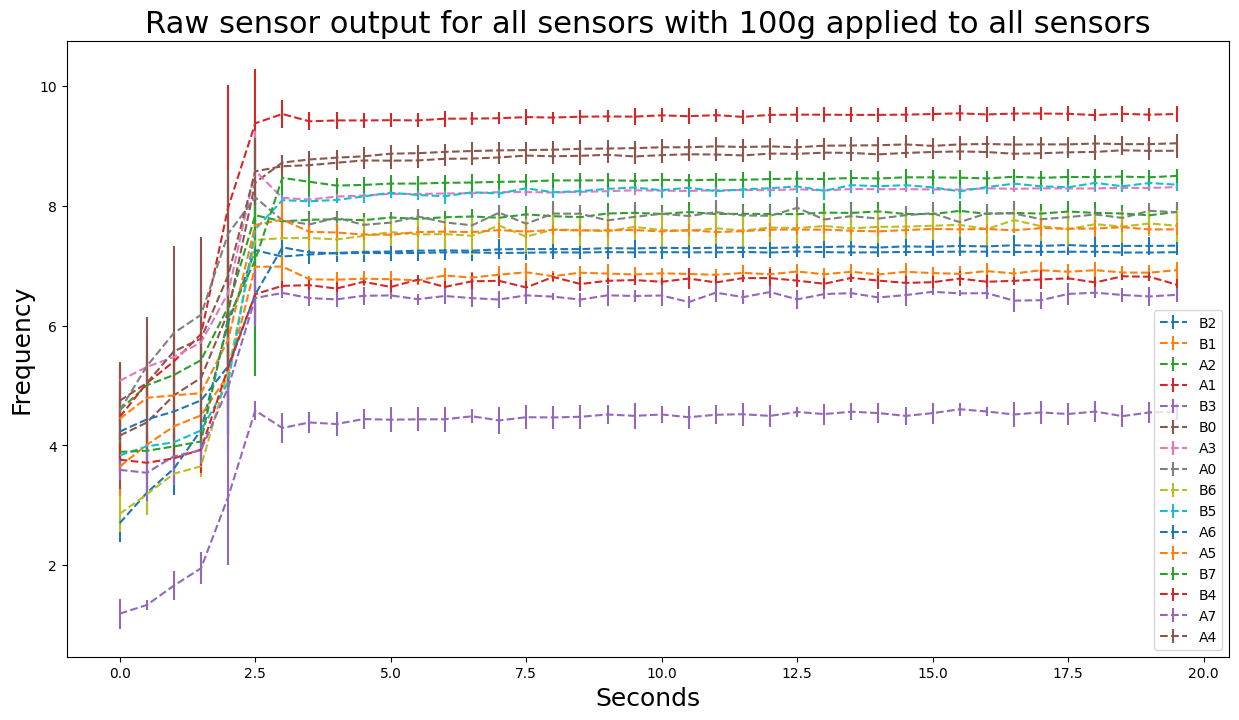

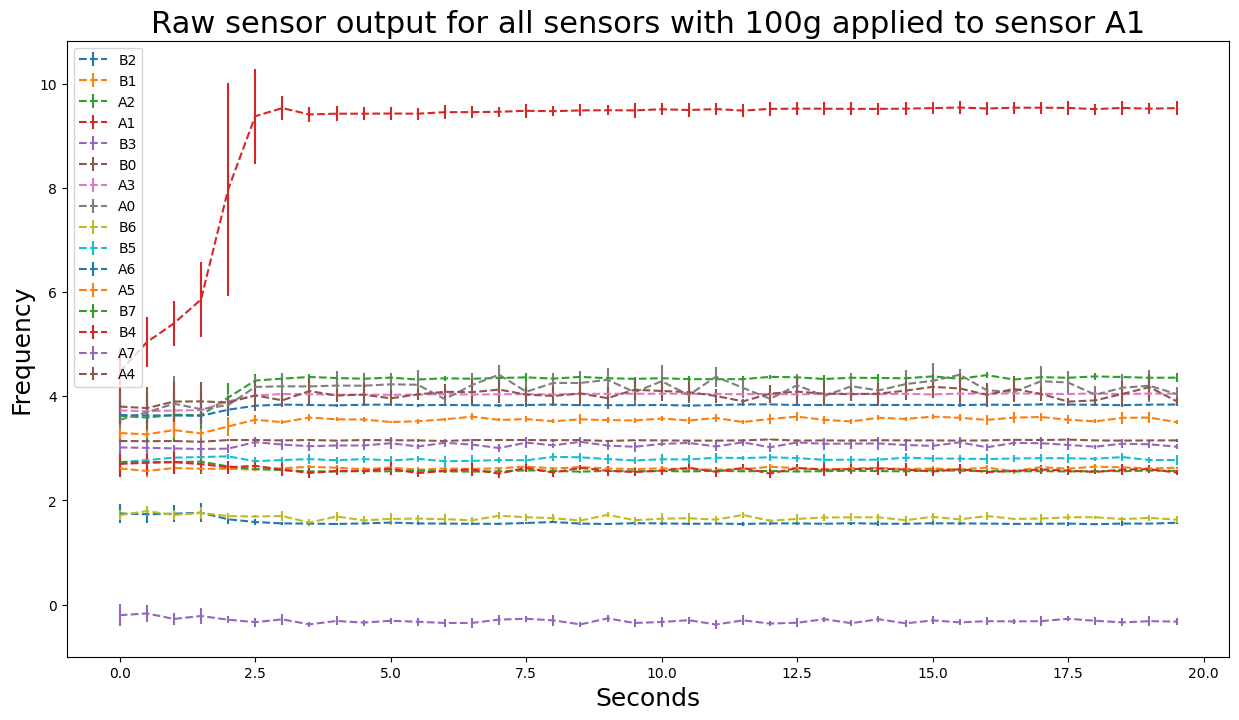

In [14]:
weight = 100
sensor = 'A1'

create_figure(df_inductance, weight=weight, title=f'Raw sensor output for all sensors with {weight}g applied to all sensors')
create_figure(df_inductance, weight=weight, sensor = sensor, title=f'Raw sensor output for all sensors with {weight}g applied to sensor {sensor}')

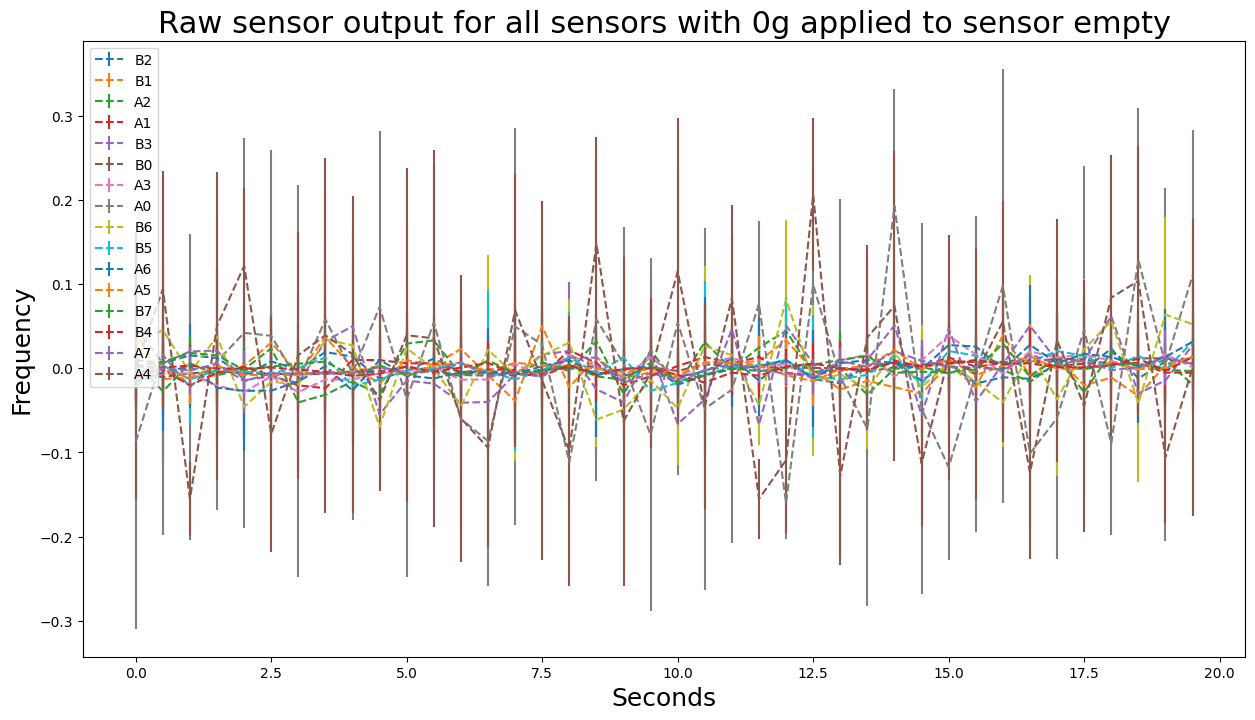

In [22]:


weight = 0
sensor = 'empty'
create_figure(df_inductance, weight=weight, sensor=sensor, title=f'Raw sensor output for all sensors with {weight}g applied to sensor {sensor}')

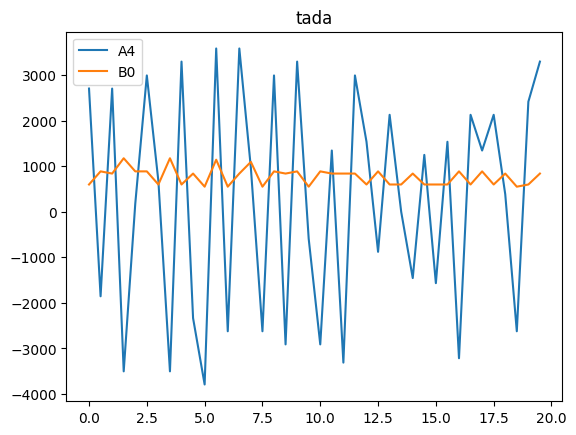

In [73]:
ids= [ "A4", "B0"] #"A0",
# id_list = ['B2', 'B1', 'A2', 'A1', 'B3', 'B0', 'A3', 'A0', 'B6', 'B5', 'A6', 'A5', 'B7', 'B4', 'A7', 'A4']

df_base = df_raw.copy()
for id in id_list:
    df_base[id] = df_base[id].apply(lambda raw: raw - baseline_raw_mean[id])

# df_induct[id_list] = df[id_list].applymap(lambda raw: (baseline_mean_output[id_list].values[0] - (1000000 * ( ( 2**25 ) / (math.pi * raw))**2)))

# df_inductance['New_Index'] = df_inductance.groupby(['Measurement_id','Sensor_id', 'Weight']).cumcount()


test = df_base[(df_base["Measurement_id"]==0)& (df_base["Weight"] == 0)]
x = np.arange(0,20,0.5)
test
plt.plot(x, test[ids], label = ids)
plt.title("tada")
plt.legend()
plt.show()


In [148]:
# A4, A7, B4, B7, 
# A5, A6, B5, B6, 
# A0, A3, B0, B3, 
# A1, A2, B1, B2